In [1]:
from IPython.display import display, Markdown, Math
import sympy as sp
import numpy as np
sp.init_printing()

## Standard Problem 

Solve the following optimization problem
$$
\begin{alignat*}{2}
    & \text{maximize: } && c^Tx \\
    & \text{subject to: } && 
        \begin{aligned}[t]
             Ax &\leq b\\
              x &\geq 0 
        \end{aligned}
\end{alignat*}
$$   


### Problem 1

$$
\begin{alignat*}{2}
    & \text{maximize: } && z = 2x + 3y\\
    & \text{subject to: } && 
        \begin{aligned}[t]
             x + 3y  &\leq 12 \\
            3x + 2y  &\leq 12 \\
              x, y &\geq 0 
        \end{aligned}
\end{alignat*}
$$   



In [2]:
# important functions
def create_table(T, basic):

    # creating table header
    no_var = len(var)
    table = "|Basic|"
    for i in range(no_var):
        table += "$" + sp.latex(var[i]) + "$|"

    table += "Solution|Ratio|\n" + "|-----" * (no_var + 3) + "|\n"


    no_rows = len(basic)
    for i in range(no_rows):
        table += "|$" + sp.latex(basic[i]) 
        for j in T.row(i):
            table += "$|$" + sp.latex(j)


        table += "$|\n"


    return display(Markdown(table))

def ratio_analysis(T, basic, y):
    entering_var = y
    entering_index = var.index(entering_var)

    # creating table header
    no_var = len(var)
    table = "|Basic|"
    for i in range(no_var):
        table += "$" + sp.latex(var[i]) + "$|"

    table += "Solution|Ratio|\n" + "|-----" * (no_var + 3) + "|\n"
    
    no_rows = len(basic)
    for i in range(no_rows):
        table += "|$" + sp.latex(basic[i]) 
        for j in T.row(i):
            table += "$|$" + sp.latex(j)


        table += "$|$" \
               + sp.latex(T.row(i)[-1]/T.row(i)[entering_index]) \
               + "$|\n"


    return display(Markdown(table)) 


def pivoting(T, basic, entering_var, leaving_var):
    entering_index = var.index(entering_var)

    leaving_index = basic.index(leaving_var)
    new_basic = basic.copy()
    new_basic[leaving_index] = entering_var

    no_rows = len(basic)
    
    T = T.elementary_row_op('n->kn', \
                            row1=leaving_index, \
                            k=1/T[leaving_index, entering_index])
    
    for i in range(no_rows):
        if i is not leaving_index:
            T = T.elementary_row_op('n->n+km',\
                                    row1=i, \
                                    row2=leaving_index, \
                                    k=-T[i, entering_index])
            
    return(T, new_basic)

### Step I

Fromulating the problem and creating the first table for simplex algorithm.

In [3]:
# problem description using matrix c, b and A
A = sp.Matrix([[1, 3], [3, 2]]);
c = sp.Matrix([-2, -3])
b = sp.Matrix([0, 12, 12])

# creating necessay data
T1 = A.col_insert(2, sp.eye(2)).row_insert(0, c.row_insert(2, sp.zeros(2,1)).T).col_insert(4, b)
x, y, z = sp.symbols("x y z")
s1, s2 = sp.symbols("s_1 s_2")

var = [x, y, s1, s2]
basic1 = [z, s1, s2]

create_table(T1, basic1)

|Basic|$x$|$y$|$s_{1}$|$s_{2}$|Solution|Ratio|
|-----|-----|-----|-----|-----|-----|-----|
|$z$|$-2$|$-3$|$0$|$0$|$0$|
|$s_{1}$|$1$|$3$|$1$|$0$|$12$|
|$s_{2}$|$3$|$2$|$0$|$1$|$12$|


### Step II

We have to choose an entering variable which will increase the value of objective. So we choose any variable with negative coefficient. Here we choose $y$. 

In [4]:
ratio_analysis(T1, basic1, y)

|Basic|$x$|$y$|$s_{1}$|$s_{2}$|Solution|Ratio|
|-----|-----|-----|-----|-----|-----|-----|
|$z$|$-2$|$-3$|$0$|$0$|$0$|$0$|
|$s_{1}$|$1$|$3$|$1$|$0$|$12$|$4$|
|$s_{2}$|$3$|$2$|$0$|$1$|$12$|$6$|


### Step III 

We have to choose a leaving variable based on ratio analysis. Here we choose the variable with least positive ratio. In this table $s_1$ has the least positive ratio, so it will leave. Now we have to perform the pivoting step.

In [5]:
T2, basic2 = pivoting(T1, basic1, y, s1)

### Step IV

After pivoting we get a new table. Where we can repreat the above steps again and again till the simplex algorithm terminate. In ideal case we get no entering varable. 

In [6]:
create_table(T2, basic2)

|Basic|$x$|$y$|$s_{1}$|$s_{2}$|Solution|Ratio|
|-----|-----|-----|-----|-----|-----|-----|
|$z$|$-1$|$0$|$1$|$0$|$12$|
|$y$|$\frac{1}{3}$|$1$|$\frac{1}{3}$|$0$|$4$|
|$s_{2}$|$\frac{7}{3}$|$0$|$- \frac{2}{3}$|$1$|$4$|


In [7]:
ratio_analysis(T2, basic2, x)

|Basic|$x$|$y$|$s_{1}$|$s_{2}$|Solution|Ratio|
|-----|-----|-----|-----|-----|-----|-----|
|$z$|$-1$|$0$|$1$|$0$|$12$|$-12$|
|$y$|$\frac{1}{3}$|$1$|$\frac{1}{3}$|$0$|$4$|$12$|
|$s_{2}$|$\frac{7}{3}$|$0$|$- \frac{2}{3}$|$1$|$4$|$\frac{12}{7}$|


In [8]:
T3, basic3 = pivoting(T2, basic2, x, s2)

In [9]:
create_table(T3, basic3)

|Basic|$x$|$y$|$s_{1}$|$s_{2}$|Solution|Ratio|
|-----|-----|-----|-----|-----|-----|-----|
|$z$|$0$|$0$|$\frac{5}{7}$|$\frac{3}{7}$|$\frac{96}{7}$|
|$y$|$0$|$1$|$\frac{3}{7}$|$- \frac{1}{7}$|$\frac{24}{7}$|
|$x$|$1$|$0$|$- \frac{2}{7}$|$\frac{3}{7}$|$\frac{12}{7}$|


Finally we got a table with all non-negaitve coefficient corresponding to $z$ variable. The solution of this problem is $96/7$ at the point $(12/7, 24/7)$

## Problem 2

Solve the following optimization problem. 

$$
\begin{alignat*}{2}
    & \text{maximize: } && z = 2x_1 + x_2 - 3x_3 + 5x_4 \\
    & \text{subject to: } && 
        \begin{aligned}[t]
             x_1 + 2x_2 + 2x_3 + 4x_4  &\leq 40 \\
            2x_1 -  x_2 +  x_3 + 2x_4  &\leq  8 \\
            4x_1 - 2x_2 +  x_3 -  x_4  &\leq 10 \\
                    x_1, x_2, x_3, x_4 &\geq 0 
        \end{aligned}
\end{alignat*}
$$   



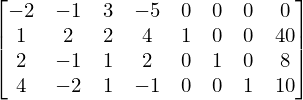

In [10]:
# problem description using matrix c, b and A
A = sp.Matrix([ [1,  2, 2,  4], \
                [2, -1, 1,  2],\
                [4, -2, 1, -1] ]);
c = sp.Matrix([2, 1, -3, 5])
b = sp.Matrix([40, 8, 10])

# creating necessay data
no_eq, no_var = A.shape

T1 = A.col_insert(no_var, sp.eye(no_eq))\
      .col_insert(no_var + no_eq, b)    \
      .row_insert(0, -c.row_insert(no_var, sp.zeros(no_eq + 1,1)).T)\
      
T1

In [11]:
x1, x2, x3, x4 = sp.symbols("x1:5")
s1, s2, s3 = sp.symbols("s1:4")
z = sp.symbols("z")

var = [x1, x2, x3, x4, s1, s2, s3]
basic1 = [z, s1, s2, s3]

create_table(T1, basic1)

|Basic|$x_{1}$|$x_{2}$|$x_{3}$|$x_{4}$|$s_{1}$|$s_{2}$|$s_{3}$|Solution|Ratio|
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|$z$|$-2$|$-1$|$3$|$-5$|$0$|$0$|$0$|$0$|
|$s_{1}$|$1$|$2$|$2$|$4$|$1$|$0$|$0$|$40$|
|$s_{2}$|$2$|$-1$|$1$|$2$|$0$|$1$|$0$|$8$|
|$s_{3}$|$4$|$-2$|$1$|$-1$|$0$|$0$|$1$|$10$|


In [12]:
ratio_analysis(T1, basic1, x4)

|Basic|$x_{1}$|$x_{2}$|$x_{3}$|$x_{4}$|$s_{1}$|$s_{2}$|$s_{3}$|Solution|Ratio|
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|$z$|$-2$|$-1$|$3$|$-5$|$0$|$0$|$0$|$0$|$0$|
|$s_{1}$|$1$|$2$|$2$|$4$|$1$|$0$|$0$|$40$|$10$|
|$s_{2}$|$2$|$-1$|$1$|$2$|$0$|$1$|$0$|$8$|$4$|
|$s_{3}$|$4$|$-2$|$1$|$-1$|$0$|$0$|$1$|$10$|$-10$|


In [13]:
T2, basic2 = pivoting(T1, basic1, x4, s2)
create_table(T2, basic2)

|Basic|$x_{1}$|$x_{2}$|$x_{3}$|$x_{4}$|$s_{1}$|$s_{2}$|$s_{3}$|Solution|Ratio|
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|$z$|$3$|$- \frac{7}{2}$|$\frac{11}{2}$|$0$|$0$|$\frac{5}{2}$|$0$|$20$|
|$s_{1}$|$-3$|$4$|$0$|$0$|$1$|$-2$|$0$|$24$|
|$x_{4}$|$1$|$- \frac{1}{2}$|$\frac{1}{2}$|$1$|$0$|$\frac{1}{2}$|$0$|$4$|
|$s_{3}$|$5$|$- \frac{5}{2}$|$\frac{3}{2}$|$0$|$0$|$\frac{1}{2}$|$1$|$14$|


In [14]:
ratio_analysis(T2, basic2, x2)

|Basic|$x_{1}$|$x_{2}$|$x_{3}$|$x_{4}$|$s_{1}$|$s_{2}$|$s_{3}$|Solution|Ratio|
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|$z$|$3$|$- \frac{7}{2}$|$\frac{11}{2}$|$0$|$0$|$\frac{5}{2}$|$0$|$20$|$- \frac{40}{7}$|
|$s_{1}$|$-3$|$4$|$0$|$0$|$1$|$-2$|$0$|$24$|$6$|
|$x_{4}$|$1$|$- \frac{1}{2}$|$\frac{1}{2}$|$1$|$0$|$\frac{1}{2}$|$0$|$4$|$-8$|
|$s_{3}$|$5$|$- \frac{5}{2}$|$\frac{3}{2}$|$0$|$0$|$\frac{1}{2}$|$1$|$14$|$- \frac{28}{5}$|


In [15]:
T3, basic3 = pivoting(T2, basic2, x2, s1)
create_table(T3, basic3)

|Basic|$x_{1}$|$x_{2}$|$x_{3}$|$x_{4}$|$s_{1}$|$s_{2}$|$s_{3}$|Solution|Ratio|
|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
|$z$|$\frac{3}{8}$|$0$|$\frac{11}{2}$|$0$|$\frac{7}{8}$|$\frac{3}{4}$|$0$|$41$|
|$x_{2}$|$- \frac{3}{4}$|$1$|$0$|$0$|$\frac{1}{4}$|$- \frac{1}{2}$|$0$|$6$|
|$x_{4}$|$\frac{5}{8}$|$0$|$\frac{1}{2}$|$1$|$\frac{1}{8}$|$\frac{1}{4}$|$0$|$7$|
|$s_{3}$|$\frac{25}{8}$|$0$|$\frac{3}{2}$|$0$|$\frac{5}{8}$|$- \frac{3}{4}$|$1$|$29$|
